# Lecture 24:  NetworkX and PageRank Algorithm


`conda install networkx=2.8.4`

You need to activate the correct environment

You may also need to install scipy in order to use some methods in networkx.

`conda install scipy=1.9.3`

## What is a graph
from wikipedia (https://en.wikipedia.org/wiki/Graph_theory):

In mathematics, graph theory is the study of graphs, which are mathematical structures used to model pairwise relations between objects. A graph in this context is made up of vertices (also called nodes or points) which are connected by edges (also called links or lines). A distinction is made between undirected graphs, where edges link two vertices symmetrically, and directed graphs, where edges link two vertices asymmetrically. Graphs are one of the principal objects of study in discrete mathematics.

There is a nice figure demonstrating graph in wikipedia.

## 什么是图表
来自维基百科 (https://en.wikipedia.org/wiki/Graph_theory)：

在数学中，图论是对图的研究，图是用于模拟对象之间成对关系的数学结构。 此上下文中的图形由顶点（也称为节点或点）组成，顶点（也称为节点或点）由边（也称为链接或线）连接。 无向图和有向图之间存在区别，无向图的边对称地连接两个顶点，而有向图的边不对称地连接两个顶点。 图是离散数学的主要研究对象之一。

维基百科中有一个很好的图来演示图表。

Examples of graphs:

- The link structure of a website can be represented by a directed graph, in which the vertices represent web pages and directed edges represent links from one page to another. 

- A similar approach can be taken to problems in social media.

- Collaboration graphs model whether two people work together in a particular way.

- Citations for academic papers.

图表示例：

- 网站的链接结构可以用有向图来表示，其中顶点代表网页，有向边代表从一个页面到另一个页面的链接。

- 可以对社交媒体中的问题采取类似的方法。

- 协作图模拟两个人是否以特定方式一起工作。

- 学术论文的引用。


## Reading Materials

__networkx for graphs:__
- https://networkx.github.io/documentation/stable/tutorial.html#creating-a-graph<br>
  Read from "Creating a graph" to "Directed graphs"

__Page Rank:__  
- https://en.wikipedia.org/wiki/PageRank

__Optional:__
- https://www.geeksforgeeks.org/page-rank-algorithm-implementation/

## Networkx

In [1]:
import matplotlib.pyplot as plt 
import networkx as nx
nx.__version__

'2.8.4'

In [2]:
import scipy
scipy.__version__

'1.9.3'

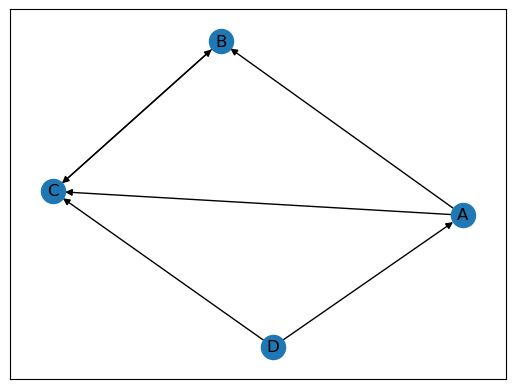

In [8]:
G = nx.DiGraph()  # create a directed graph
G.add_nodes_from(['A', 'B', 'C','D'])
G.add_edge('A', 'C')
G.add_edge('B', 'C')
G.add_edge('C', 'B')
G.add_edge('A', 'B')
G.add_edge('D', 'A')
G.add_edge('D', 'C')
nx.draw_networkx(G,with_labels=True)
# nx.draw_networkx(G,with_labels=False)  # remove the A,B,C,D
plt.show()

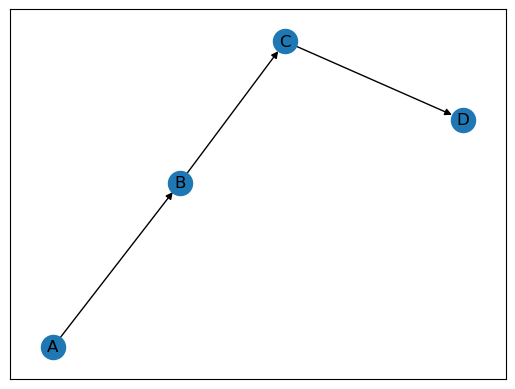

In [10]:
G1 = nx.DiGraph()
G1.add_nodes_from(['A', 'B', 'C','D'])
G1.add_edges_from([['A','B'],['C','D'],['B','C']])
nx.draw_networkx(G1,with_labels=True)
plt.show()

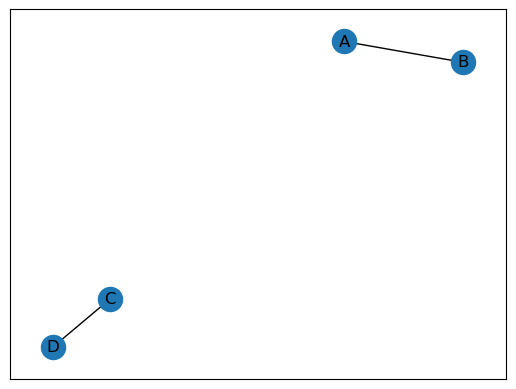

In [11]:
G2 = nx.Graph()  # create a undirected graph
G2.add_nodes_from(['A', 'B', 'C','D'])
G2.add_edges_from([['A','B'],['C','D']])
nx.draw_networkx(G2,with_labels=True)
plt.show()

In [12]:
print(G.nodes, type(G.nodes))
print(G.edges, type(G.edges))
print(G.number_of_nodes(), G.number_of_edges())


['A', 'B', 'C', 'D'] <class 'networkx.classes.reportviews.NodeView'>
[('A', 'C'), ('A', 'B'), ('B', 'C'), ('C', 'B'), ('D', 'A'), ('D', 'C')] <class 'networkx.classes.reportviews.OutEdgeView'>
4 6


In [14]:
for i in G.nodes:
  print(i)  # A B C D
print(list(G.nodes))  # ['A', 'B', 'C', 'D']
print('================')
for i in G.edges:
  print(i)  # ('A', 'C')  ('A', 'B')  ('B', 'C')  ('C', 'B')  ('D', 'A')  ('D', 'C')
print(list(G.edges))  # [('A', 'C'), ('A', 'B'), ('B', 'C'), ('C', 'B'), ('D', 'A'), ('D', 'C')]

A
B
C
D
['A', 'B', 'C', 'D']
('A', 'C')
('A', 'B')
('B', 'C')
('C', 'B')
('D', 'A')
('D', 'C')
[('A', 'C'), ('A', 'B'), ('B', 'C'), ('C', 'B'), ('D', 'A'), ('D', 'C')]


## Page Rank

We can use the equilibrium distribution of users on the internet as an approximation for the relative popularity of web pages. We start with an adjacency matrix, __A__, of which the elements represent links between pages. If a page has a number of links to other pages, we assume that a user picks one of them uniformly at random and moves to the next page. However, internet users do not navigate the web only by following links. (If you end up on a page with no links on it, you do not get stuck there for the rest of your life.) Users also occasionally move between pages with no links on them. We call this teleportation, and to simulate it in our model, we simply add a small constant to every element of __A__. This will translate to their being a non-zero probability of moving between any pair of pages, whether or not there is a link.

我们可以使用互联网上用户的均衡分布作为网页相对流行度的近似值。 我们从邻接矩阵 __A__ 开始，其中的元素表示页面之间的链接。 如果一个页面有多个指向其他页面的链接，我们假设用户随机均匀地选择其中一个并移动到下一个页面。 然而，互联网用户不仅仅通过点击链接来浏览网络。 （如果你最终进入一个没有链接的页面，你的余生都不会被困在那里。）用户偶尔也会在没有链接的页面之间移动。 我们称之为隐形传态，为了在我们的模型中模拟它，我们只需向 __A__ 的每个元素添加一个小常数。 这将转化为它们在任何一对页面之间移动的非零概率，无论是否有链接。


Here is the detail of the PageRank algorithm<br>

这是 PageRank 算法的详细信息<br>

$$PR_0(x) = \frac{1}{N}$$

$$PR_i(x) = \frac{1-\alpha}{N}+\alpha\sum_{y\rightarrow x}\frac{PR_{i-1}(y)}{out(y)}$$

- $PR_i(x)$: the PageRank of node x at i-th iteration  节点 x 在第 i 次迭代时的 PageRank
- $\alpha$: a damping factor (we can set it to 0.85)  阻尼系数（我们可以将其设置为 0.85）
- $N$: the total number of nodes in the system  系统中的节点总数
- $out(y)$: the number of outlinks of node y  节点y的出链数

In [15]:
pr = nx.pagerank(G, alpha=0.85) # the default damping parameter alpha = 0.85
print(pr)

{'A': 0.053437500000000006, 'B': 0.4502247288314529, 'C': 0.45883777116854707, 'D': 0.037500000000000006}


In [16]:
W = nx.stochastic_graph(G, weight="weight")  # Create a new graph call W, which copy of G. But ending to the weight as edges. 创建一个新的图形调用 W，它是 G 的副本。但以权重作为边结束。
print(W.edges[('A','B')], W.edges['A','B'])

for e in W.edges:
    print(e, W.edges[e]['weight'])

print(W['A']['B']['weight'])

# 以下print出来的weight权重全根据G:directed graph指向来决定

{'weight': 0.5} {'weight': 0.5}
('A', 'C') 0.5
('A', 'B') 0.5
('B', 'C') 1.0
('C', 'B') 1.0
('D', 'A') 0.5
('D', 'C') 0.5
0.5


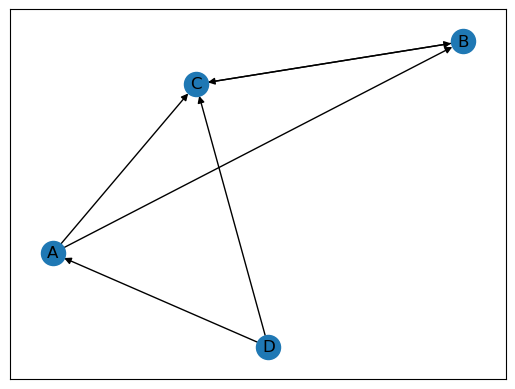

In [22]:
nx.draw_networkx(W,with_labels=True)
plt.show()

In [23]:
x = ('key1', 'key2', 'key3')
y = 0
thisdict = dict.fromkeys(x, y)
print(thisdict)

{'key1': 0, 'key2': 0, 'key3': 0}


In [24]:
x = ('key1', 'key2', 'key3')
y = ('value1', 'value2', 'value3')
thisdict = dict.fromkeys(x, y)
print(thisdict)

{'key1': ('value1', 'value2', 'value3'), 'key2': ('value1', 'value2', 'value3'), 'key3': ('value1', 'value2', 'value3')}


In [26]:
for i in W:  # equal to: for i in W.nodes
  print(i)
print(dict.fromkeys(W, 0.1))

A
B
C
D
{'A': 0.1, 'B': 0.1, 'C': 0.1, 'D': 0.1}


In [27]:
W.out_degree('A', weight="weight")

1.0

In [28]:
# The following code is a simplified version of the function 
# which has been implemented in the networkx library.

def pagerank(G, alpha=0.85,
             max_iter=100, tol=1.0e-6, weight='weight'):    
    if len(G) == 0:
        return {}
 
    # Create a copy in (right) stochastic form
    W = nx.stochastic_graph(G, weight=weight)
    N = W.number_of_nodes()
 
    # initialize
    x = dict.fromkeys(W, 1.0 / N)
 
    # power iteration: make up to max_iter iterations  幂迭代：最多 max_iter 次迭代
    for _ in range(max_iter):
        xlast = x
        x = dict.fromkeys(xlast.keys(), 0)
        for n in x:  # n is node
            for nbr in W[n]:  # n is pointing to neighbor, nbr is neighborhood
                x[nbr] += alpha * xlast[n] * W[n][nbr][weight]
            x[n] += (1.0 - alpha)/N
 
        # check convergence
        err = sum([abs(x[n] - xlast[n]) for n in x])
        if err < N*tol:
            return x
    raise nx.NetworkXError('pagerank: power iteration failed to converge '
                        'in %d iterations.' % max_iter)

{'C': {'weight': 0.5}, 'B': {'weight': 0.5}}
{'C': {'weight': 1.0}}
{'B': {'weight': 1.0}}
{'A': {'weight': 0.5}, 'C': {'weight': 0.5}}


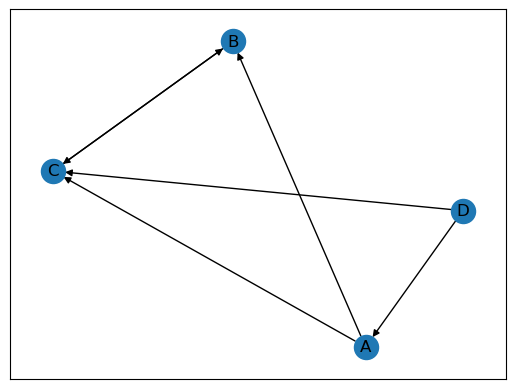

In [29]:
W = nx.stochastic_graph(G, weight='weight')
print(W['A'])
print(W['B'])
print(W['C'])
print(W['D'])
nx.draw_networkx(W,with_labels=True)
plt.show()

In [30]:
pagerank(W)

{'A': 0.053437500000000006,
 'B': 0.45022472883145276,
 'C': 0.458837771168547,
 'D': 0.037500000000000006}